In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/content/Healthcare Providers.csv")


In [9]:

print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
5,3443985,1346571551,PUGH,JOHN,R,DPT,M,I,504 ALBEMARLE SQ,NaN,...,97016,Application of blood vessel compression or dec...,N,192,36,192,13.550989583,63.1125,9.6764583333,10.506927083
6,2137027,1215943535,BRUMITT,TOM,B,DO,M,I,70 DOCTORS PARK,NaN,...,20610,Aspiration and/or injection of large joint or ...,N,21,19,21,45.971904762,164.57142857,36.036190476,37.77952381
7,6169160,1629160551,GALBREATH,RONALD,G,M.D.,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52,50,52,29.33,50,28.74,25.32
8,5086226,1518929124,BOONE,RALPH,M,D.O.,M,I,1215 DUNN AVE,NaN,...,80061,"Blood test, lipids (cholesterol and triglyceri...",N,73,68,73,15.510410959,76,15.197945205,15.197945205
9,3900718,1396781134,METWEST INC,NaN,NaN,NaN,NaN,O,695 S BROADWAY,NaN,...,84392,Urine sulfate (acid) level,N,19,16,19,6.51,29.65,6.38,6.38


In [10]:
print("Shape of the Dataset:")
df.shape

Shape of the Dataset:


(8978, 27)

In [11]:
print("\nDataset Information")
df.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8978 entries, 0 to 8977
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     8978 non-null   int64  
 1   National Provider Identifier                              8978 non-null   int64  
 2   Last Name/Organization Name of the Provider               8978 non-null   object 
 3   First Name of the Provider                                8573 non-null   object 
 4   Middle Initial of the Provider                            6312 non-null   object 
 5   Credentials of the Provider                               8313 non-null   object 
 6   Gender of the Provider                                    8573 non-null   object 
 7   Entity Type of the Provider                               8978 non-null   object 
 8

In [12]:
print("\nStatistical summary of the dataset:")
print(df.describe(include='all'))


Statistical summary of the dataset:
               index  National Provider Identifier  \
count   8.978000e+03                  8.978000e+03   
unique           NaN                           NaN   
top              NaN                           NaN   
freq             NaN                           NaN   
mean    4.910491e+06                  1.498480e+09   
std     2.840642e+06                  2.874955e+08   
min     3.900000e+02                  1.003002e+09   
25%     2.433124e+06                  1.245422e+09   
50%     4.916720e+06                  1.497940e+09   
75%     7.348631e+06                  1.740370e+09   
max     9.845826e+06                  1.992985e+09   

       Last Name/Organization Name of the Provider First Name of the Provider  \
count                                         8978                       8573   
unique                                        6523                       2678   
top                                          PATEL                    M

In [13]:
print("\nMissing values and their percentages:")
missing_values=df.isnull().sum()
missing_percentages=(missing_values/len(df))*100
missing_data=pd.DataFrame({
    'Missing Values':missing_values,
    'Percentage':missing_percentages
})
print(missing_data)


Missing values and their percentages:
                                                    Missing Values  Percentage
index                                                            0    0.000000
National Provider Identifier                                     0    0.000000
Last Name/Organization Name of the Provider                      0    0.000000
First Name of the Provider                                     405    4.511027
Middle Initial of the Provider                                2666   29.694810
Credentials of the Provider                                    665    7.406995
Gender of the Provider                                         405    4.511027
Entity Type of the Provider                                      0    0.000000
Street Address 1 of the Provider                                 0    0.000000
Street Address 2 of the Provider                              5369   59.801738
City of the Provider                                             1    0.011138
Zip Code of t

In [14]:
cleaned_df=df.dropna(thresh=len(df)*0.5,axis=1)
print("Shape after removing columns with more than 50% missing values:")
print(cleaned_df.shape)

Shape after removing columns with more than 50% missing values:
(8978, 26)


In [15]:
df = df.dropna(subset=['Gender of the Provider', 'Provider Type'])

In [3]:
# Example: Financial metrics columns might be strings; convert them to numeric
financial_columns = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

In [16]:
for col in financial_columns:
  df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)

In [17]:
# Count the distribution of provider types
provider_type_counts = df['Provider Type'].value_counts()

In [18]:
print("\nData cleaning completed.")



Data cleaning completed.


In [19]:
# Identify the most and least common provider types
most_common = provider_type_counts.idxmax()
least_common = provider_type_counts.idxmin()
print(f"\nMost Common Provider Type: {most_common} ({provider_type_counts.max()} instances)")
print(f"Least Common Provider Type: {least_common} ({provider_type_counts.min()} instances)")


Most Common Provider Type: Diagnostic Radiology (1121 instances)
Least Common Provider Type: Addiction Medicine (1 instances)


In [20]:
# Gender balance analysis
gender_counts = df['Gender of the Provider'].value_counts()

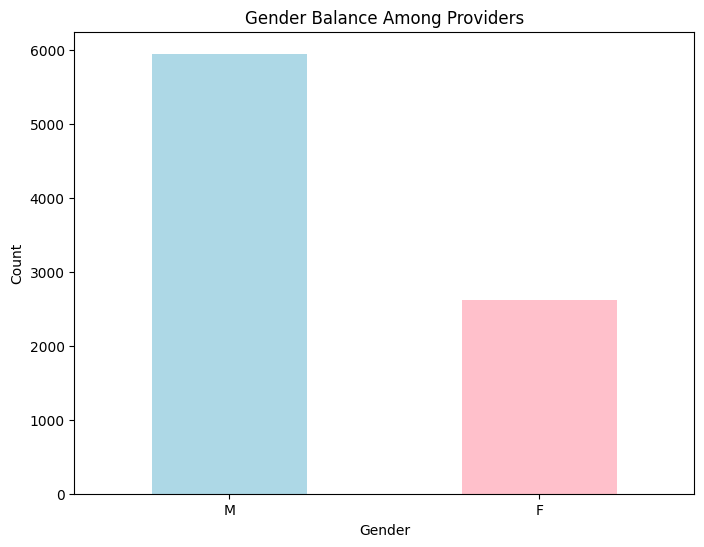

In [21]:
# Plotting the Bar chart for gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Gender Balance Among Providers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [22]:
# Count the number of providers in each state
state_counts = df['State Code of the Provider'].value_counts()

In [23]:
# Select the top 10 states with the most providers
top_states = state_counts.head(10)

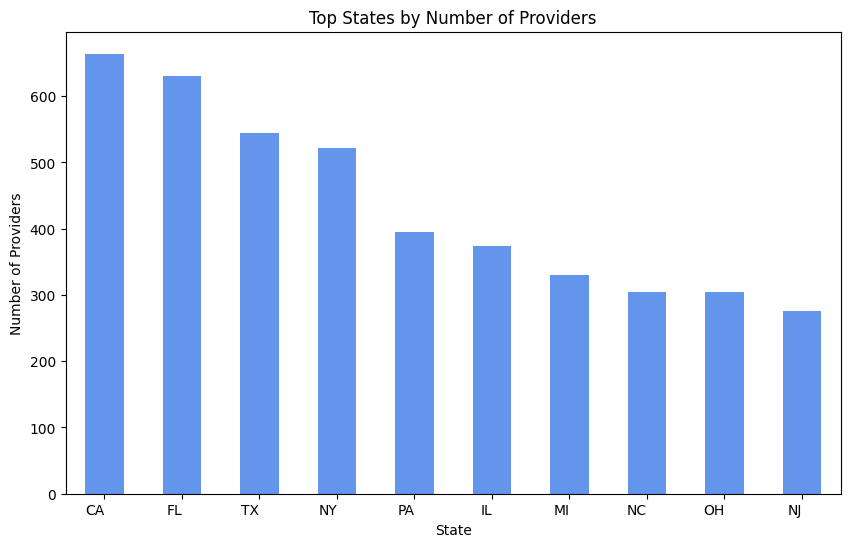

In [24]:
# 2.)Plotting the Bar chart for top states by number of providers
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='cornflowerblue')
plt.title('Top States by Number of Providers')
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0, ha='right')
plt.show()

In [25]:
# Display the top states and their provider counts
print("\nTop States by Number of Providers:")
print(top_states)


Top States by Number of Providers:
State Code of the Provider
CA    664
FL    631
TX    545
NY    521
PA    395
IL    374
MI    330
NC    304
OH    304
NJ    276
Name: count, dtype: int64


In [26]:
city_counts = df['City of the Provider'].value_counts()

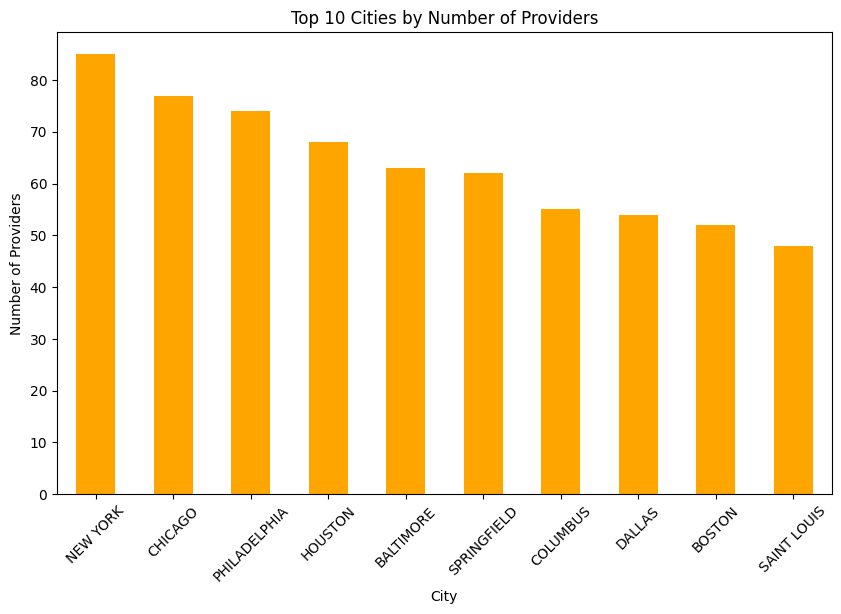

In [27]:
# 3.)Plotting a bar chart for cities with the most active healthcare providers
top_cities = city_counts.head(10)
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Number of Providers')
plt.xlabel('City')
plt.ylabel('Number of Providers')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Preparing a pivot table for heatmap
state_city_counts = df.groupby(['State Code of the Provider', 'City of the Provider']).size().unstack(fill_value=0)

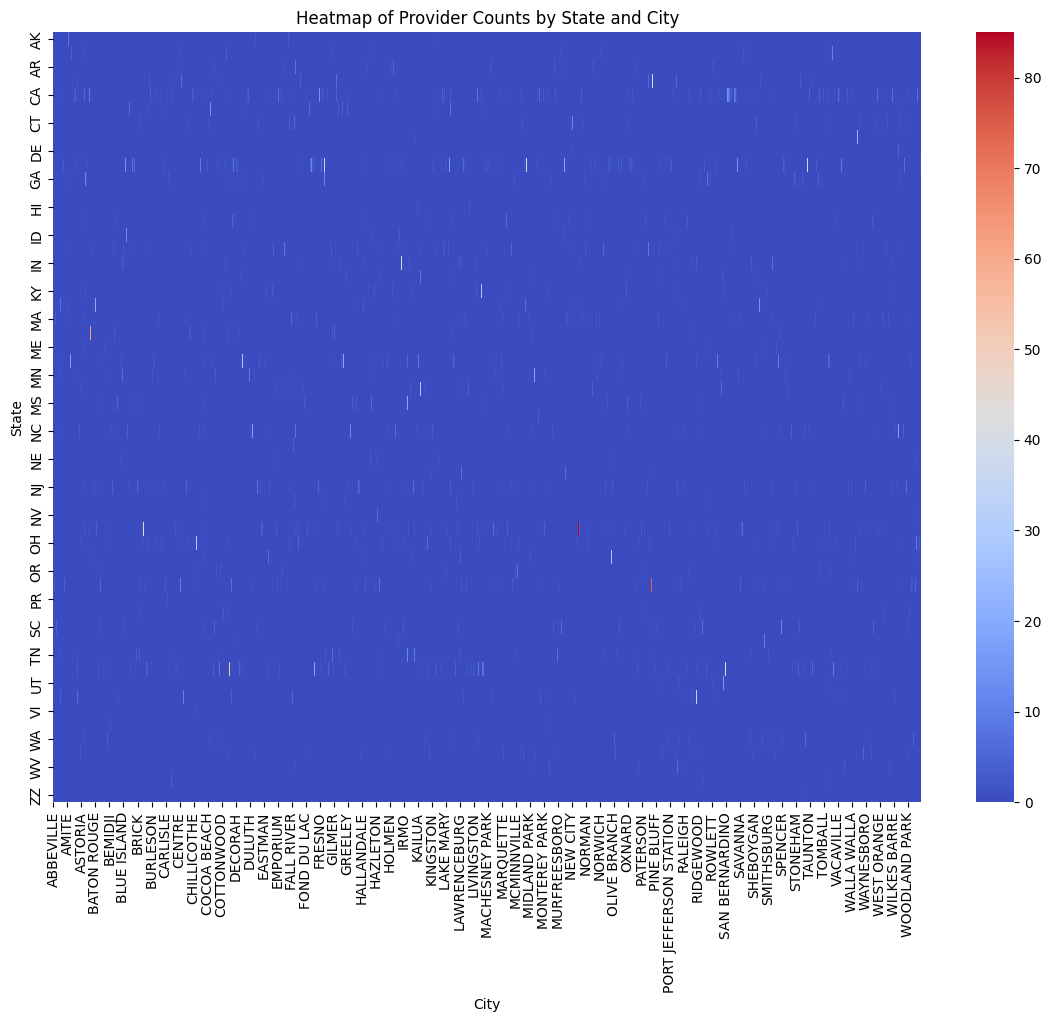

In [29]:
# Heatmap visualization
plt.figure(figsize=(14, 10))
sns.heatmap(state_city_counts, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Provider Counts by State and City')
plt.xlabel('City')
plt.ylabel('State')
plt.show()

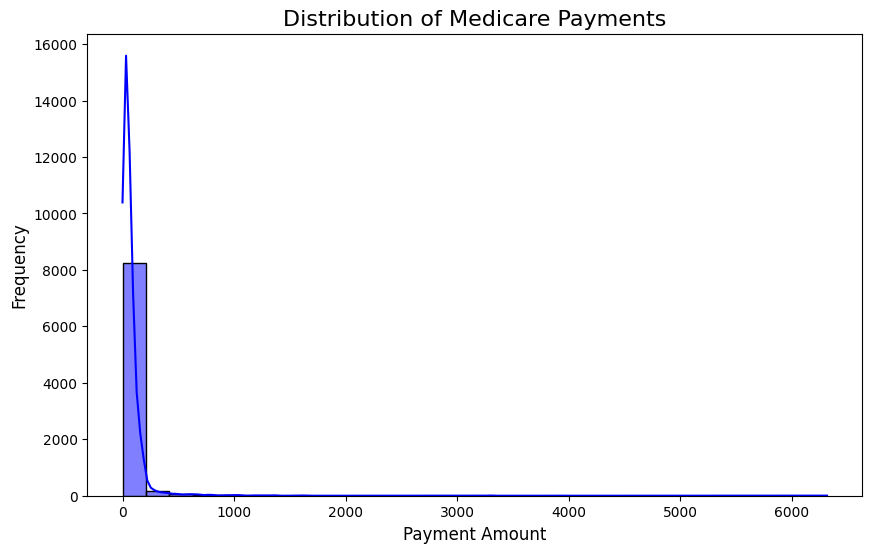

In [30]:
# Plotting bar char of Medicare Payments with a different color
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Medicare Payment Amount'], bins=30, kde=True, color='Blue')
plt.title('Distribution of Medicare Payments', fontsize=16)
plt.xlabel('Payment Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [31]:
# Generate summary statistics for these column
summary_stats = df[financial_columns].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Average Medicare Allowed Amount  Average Submitted Charge Amount  \
count                      8572.000000                      8572.000000   
mean                         95.155620                       328.086664   
std                         183.793418                       809.641946   
min                           0.018684                         0.030000   
25%                          25.230000                        60.000000   
50%                          66.270000                       148.435313   
75%                         111.317308                       293.635417   
max                        8057.868929                     29537.500000   

       Average Medicare Payment Amount  Average Medicare Standardized Amount  
count                      8572.000000                           8572.000000  
mean                         72.035675                             72.488506  
std                         143.107496                            